# Practical - 3

In [30]:
# ===============================
# 1. Import Required Libraries
# ===============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Player Dataset

In [31]:
# ===============================
# 2. Load Dataset
# ===============================
df = pd.read_csv(r"C:\Drive (D)\College\SEM. - 6\ADML\Dataset\Player.csv")

display(df.head())

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [32]:
# ===============================
# 3. Data Cleaning
# ===============================

# Drop unnecessary column
df.drop(columns=['Unnamed: 0'], inplace=True)

# Drop rows where Salary is missing
df.dropna(subset=['Salary'], inplace=True)

# One-hot encode categorical columns
df = pd.get_dummies(df, columns=['League', 'Division', 'NewLeague'], drop_first=True)

print(df.shape)


(263, 20)


In [33]:
# ===============================
# 4. Feature Selection
# ===============================
X = df.drop('Salary', axis=1)
y = np.log1p(df['Salary'])


In [34]:
# ===============================
# 5. Train-Test Split
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [35]:
dt_unpruned = DecisionTreeRegressor(random_state=42)
dt_unpruned.fit(X_train, y_train)

y_pred_unpruned = dt_unpruned.predict(X_test)

print("Unpruned Tree")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_unpruned)))
print("R2 Score:", r2_score(y_test, y_pred_unpruned))


Unpruned Tree
RMSE: 0.7150604779086046
R2 Score: 0.20040076122384365


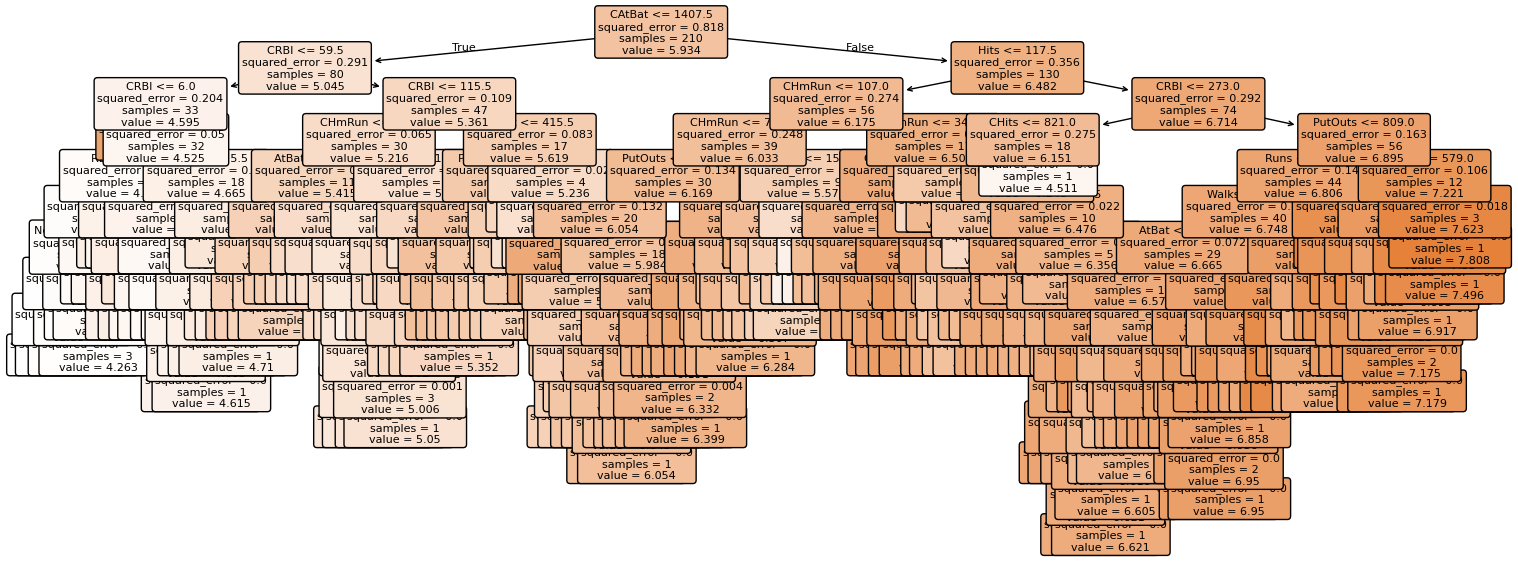

In [36]:
plt.figure(figsize=(18,7))
plot_tree(
    dt_unpruned,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=8
)
plt.show()

In [37]:
dt_pre_pruned = DecisionTreeRegressor(
    max_depth=4,
    min_samples_leaf=10,
    random_state=42
)

dt_pre_pruned.fit(X_train, y_train)

y_pred_pre = dt_pre_pruned.predict(X_test)

print("\nPre-Pruned Tree")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_pre)))
print("R2 Score:", r2_score(y_test, y_pred_pre))



Pre-Pruned Tree
RMSE: 0.5982052980531476
R2 Score: 0.44038759562900864


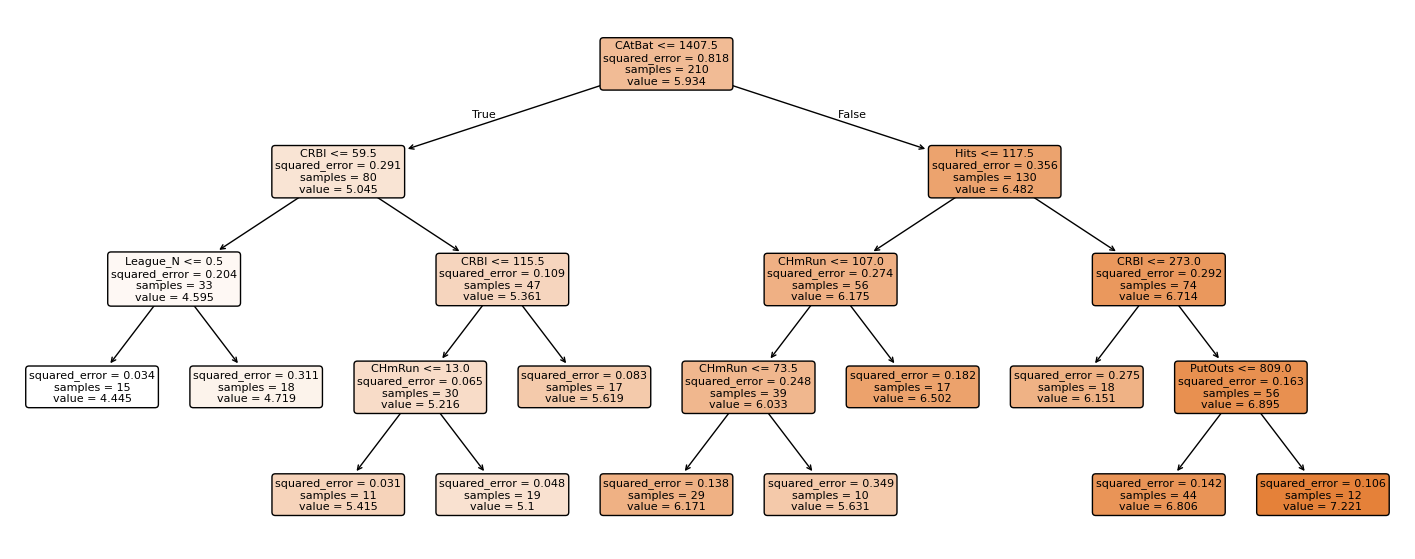

In [38]:
plt.figure(figsize=(18,7))
plot_tree(
    dt_pre_pruned,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=8
)
plt.show()

In [39]:
path = dt_unpruned.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas


In [40]:
ccp_alphas

array([0.00000000e+00, 6.76707367e-17, 1.35341473e-16, 2.70682947e-16,
       3.21436000e-16, 6.06898394e-09, 1.25935782e-07, 1.39594594e-07,
       1.65621754e-07, 1.77864550e-07, 3.32491262e-07, 4.27844606e-07,
       4.27844606e-07, 6.76587126e-07, 8.94352736e-07, 8.95446850e-07,
       9.29179431e-07, 1.03239846e-06, 1.14012631e-06, 1.19926282e-06,
       1.30597439e-06, 1.34346810e-06, 1.49572030e-06, 1.84764265e-06,
       1.86840523e-06, 1.94053224e-06, 1.98911082e-06, 1.99602842e-06,
       1.99602842e-06, 2.22701377e-06, 3.35738943e-06, 3.46058044e-06,
       4.06191524e-06, 4.08138855e-06, 4.46336521e-06, 4.49249903e-06,
       4.57798025e-06, 4.94797921e-06, 4.99646093e-06, 5.05807182e-06,
       5.14307087e-06, 5.20492173e-06, 5.24733586e-06, 5.48872595e-06,
       5.73314875e-06, 6.23175399e-06, 6.23865861e-06, 6.53162383e-06,
       6.58709924e-06, 7.74331431e-06, 8.12828055e-06, 9.58941173e-06,
       9.66596429e-06, 1.05604723e-05, 1.07368605e-05, 1.08159902e-05,
      

In [41]:
models = []

for alpha in ccp_alphas:
    dt = DecisionTreeRegressor(random_state=42, ccp_alpha=alpha)
    dt.fit(X_train, y_train)
    models.append(dt)


In [42]:
train_scores = []
test_scores = []

for model in models:
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))


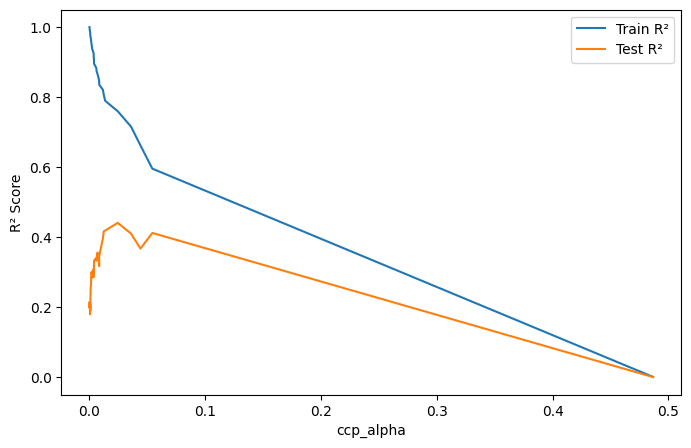

In [43]:
plt.figure(figsize=(8,5))
plt.plot(ccp_alphas, train_scores, label='Train R²')
plt.plot(ccp_alphas, test_scores, label='Test R²')
plt.xlabel("ccp_alpha")
plt.ylabel("R² Score")
plt.legend()
plt.show()


In [44]:
best_alpha = ccp_alphas[np.argmax(test_scores)]

dt_post_pruned = DecisionTreeRegressor(
    random_state=42,
    ccp_alpha=best_alpha
)

dt_post_pruned.fit(X_train, y_train)

y_pred_post = dt_post_pruned.predict(X_test)

print("\nPost-Pruned Tree")
print("Best Alpha:", best_alpha)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_post)))
print("R2 Score:", r2_score(y_test, y_pred_post))



Post-Pruned Tree
Best Alpha: 0.024441367305088744
RMSE: 0.5981740145302435
R2 Score: 0.44044612466499666


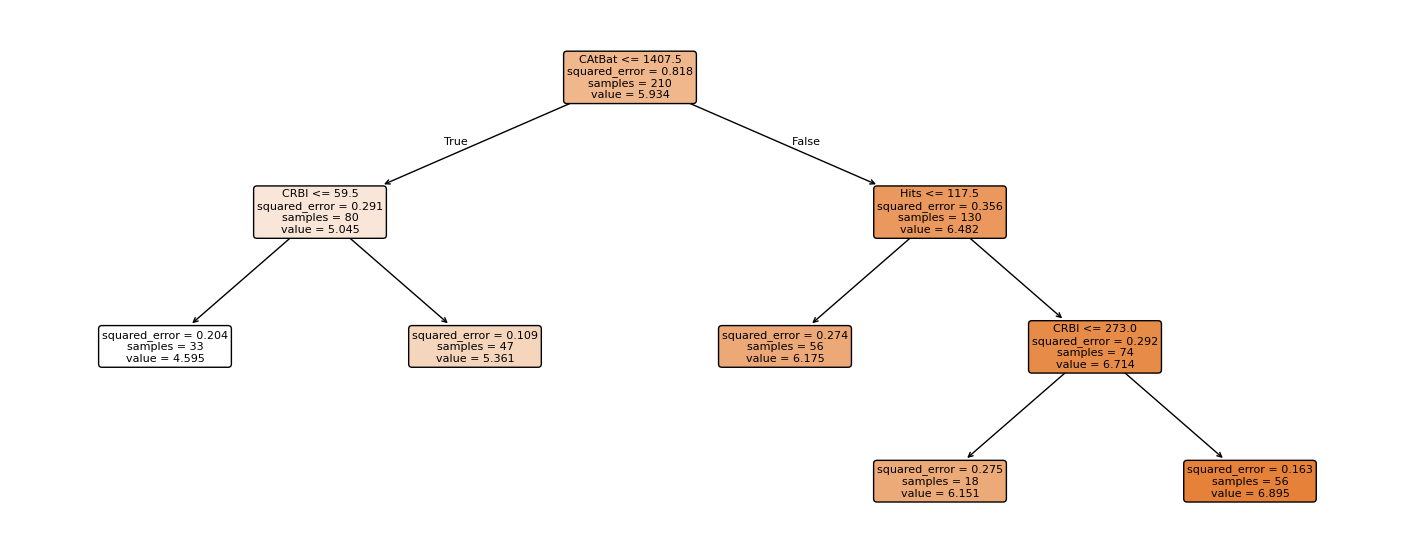

In [45]:
plt.figure(figsize=(18,7))
plot_tree(
    dt_post_pruned,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=8
)
plt.show()


The unpruned decision tree overfits the training data and performs poorly on unseen data.
Pre-pruning reduces model complexity and improves generalization.
Cost-complexity post-pruning provides the best bias-variance trade-off, resulting in the highest test R².
Log transformation of salary improves model stability and prediction accuracy.

# Housing Dataset

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [47]:
df = pd.read_csv(r"C:\Drive (D)\College\SEM. - 6\ADML\Dataset\HousingData.csv")
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [77]:
display(df.describe())
print(df.shape)
print(df.isnull().sum())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


(394, 14)
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [48]:
# Replace 'NA' with NaN
df.replace("NA", np.nan, inplace=True)

# Convert all columns to numeric
df = df.apply(pd.to_numeric)

# Drop rows with missing values
df.dropna(inplace=True)


In [49]:
X = df.drop('MEDV', axis=1)   # Features
y = df['MEDV']               # Target (House Price)


In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [51]:
dt = DecisionTreeRegressor(
    max_depth=6,
    random_state=42
)

dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


In [52]:
print("DECISION TREE REGRESSION")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("R²:", r2_score(y_test, y_pred_dt))


DECISION TREE REGRESSION
RMSE: 5.467965919354242
MAE: 3.2209490332008652
R²: 0.6455255666643475


In [53]:
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [54]:
print("\nRANDOM FOREST REGRESSION")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("R²:", r2_score(y_test, y_pred_rf))



RANDOM FOREST REGRESSION
RMSE: 5.314456533002206
MAE: 2.7175217987708935
R²: 0.6651494339366985


In [55]:
results = pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest"],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_dt)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf))
    ],
    "MAE": [
        mean_absolute_error(y_test, y_pred_dt),
        mean_absolute_error(y_test, y_pred_rf)
    ],
    "R²": [
        r2_score(y_test, y_pred_dt),
        r2_score(y_test, y_pred_rf)
    ]
})

results


,Model,RMSE,MAE,R²
0,Decision Tree,5.467966,3.220949,0.645526
1,Random Forest,5.314457,2.717522,0.665149


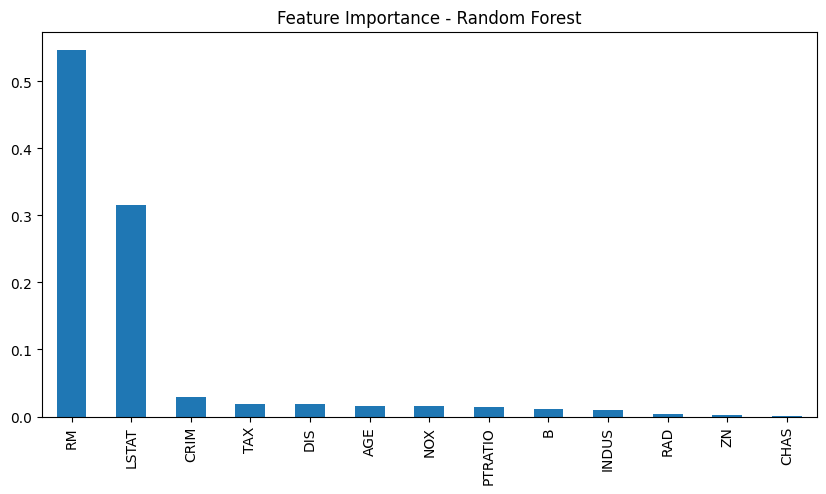

In [56]:
importances = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importances.plot(kind='bar', figsize=(10,5))
plt.title("Feature Importance - Random Forest")
plt.show()


The Random Forest Regression model outperforms the Decision Tree Regression model with lower RMSE, lower MAE, and higher R² score.
This improvement is due to ensemble learning, which reduces model variance and enhances generalization.
Although the improvement is moderate, it demonstrates the effectiveness of Random Forest in handling complex, non-linear relationships in housing data.

# Pruned(un, pre, post)

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [60]:
df = pd.read_csv(r"C:\Drive (D)\College\SEM. - 6\ADML\Dataset\HousingData.csv")
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [61]:
# Replace 'NA' with NaN
df.replace("NA", np.nan, inplace=True)

# Convert all columns to numeric
df = df.apply(pd.to_numeric)

# Drop missing rows
df.dropna(inplace=True)


In [62]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']


In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [64]:
dt_unpruned = DecisionTreeRegressor(random_state=42)
dt_unpruned.fit(X_train, y_train)

y_pred_unpruned = dt_unpruned.predict(X_test)


In [65]:
print("UNPRUNED DECISION TREE")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_unpruned)))
print("MAE:", mean_absolute_error(y_test, y_pred_unpruned))
print("R²:", r2_score(y_test, y_pred_unpruned))


UNPRUNED DECISION TREE
RMSE: 5.211355663174532
MAE: 3.2683544303797474
R²: 0.6780156625862424


In [66]:
dt_pre = DecisionTreeRegressor(
    max_depth=5,
    min_samples_leaf=5,
    min_samples_split=10,
    random_state=42
)

dt_pre.fit(X_train, y_train)
y_pred_pre = dt_pre.predict(X_test)


In [67]:
print("\nPRE-PRUNED DECISION TREE")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_pre)))
print("MAE:", mean_absolute_error(y_test, y_pred_pre))
print("R²:", r2_score(y_test, y_pred_pre))



PRE-PRUNED DECISION TREE
RMSE: 5.376825559051747
MAE: 3.07441741099969
R²: 0.6572438843024699


In [68]:
path = dt_unpruned.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas


In [69]:
train_scores = []
test_scores = []

for alpha in ccp_alphas:
    model = DecisionTreeRegressor(random_state=42, ccp_alpha=alpha)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))


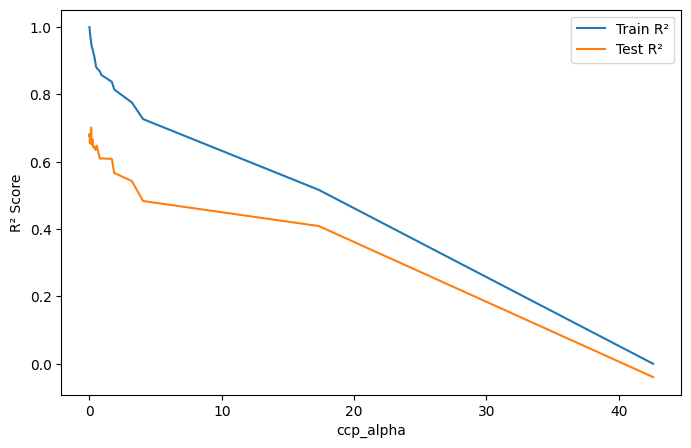

In [70]:
plt.figure(figsize=(8,5))
plt.plot(ccp_alphas, train_scores, label="Train R²")
plt.plot(ccp_alphas, test_scores, label="Test R²")
plt.xlabel("ccp_alpha")
plt.ylabel("R² Score")
plt.legend()
plt.show()


In [71]:
best_alpha = ccp_alphas[np.argmax(test_scores)]
print("Best ccp_alpha:", best_alpha)


Best ccp_alpha: 0.13227513227510146


In [72]:
dt_post = DecisionTreeRegressor(
    random_state=42,
    ccp_alpha=best_alpha
)

dt_post.fit(X_train, y_train)
y_pred_post = dt_post.predict(X_test)


In [73]:
print("\nPOST-PRUNED DECISION TREE")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_post)))
print("MAE:", mean_absolute_error(y_test, y_pred_post))
print("R²:", r2_score(y_test, y_pred_post))



POST-PRUNED DECISION TREE
RMSE: 5.017649057880985
MAE: 3.052913678962979
R²: 0.701507183111492


In [74]:
rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=15,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [75]:
print("\nRANDOM FOREST REGRESSION")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("R²:", r2_score(y_test, y_pred_rf))



RANDOM FOREST REGRESSION
RMSE: 5.341287710758613
MAE: 2.7356734206300017
R²: 0.6617597684342693


In [76]:
results = pd.DataFrame({
    "Model": [
        "Decision Tree (Unpruned)",
        "Decision Tree (Pre-Pruned)",
        "Decision Tree (Post-Pruned)",
        "Random Forest"
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_unpruned)),
        np.sqrt(mean_squared_error(y_test, y_pred_pre)),
        np.sqrt(mean_squared_error(y_test, y_pred_post)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf))
    ],
    "MAE": [
        mean_absolute_error(y_test, y_pred_unpruned),
        mean_absolute_error(y_test, y_pred_pre),
        mean_absolute_error(y_test, y_pred_post),
        mean_absolute_error(y_test, y_pred_rf)
    ],
    "R²": [
        r2_score(y_test, y_pred_unpruned),
        r2_score(y_test, y_pred_pre),
        r2_score(y_test, y_pred_post),
        r2_score(y_test, y_pred_rf)
    ]
})

results


,Model,RMSE,MAE,R²
0,Decision Tree (Unpruned),5.211356,3.268354,0.678016
1,Decision Tree (Pre-Pruned),5.376826,3.074417,0.657244
2,Decision Tree (Post-Pruned),5.017649,3.052914,0.701507
3,Random Forest,5.341288,2.735673,0.661760
